In [1]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 62 kB/s 
     |████████████████████████████████| 6.8 MB 45.4 MB/s 
     |████████████████████████████████| 981 kB 67.6 MB/s 
     |████████████████████████████████| 263 kB 47.0 MB/s 
     |████████████████████████████████| 2.8 MB 57.5 MB/s 
     |████████████████████████████████| 1.2 MB 56.6 MB/s 
     |████████████████████████████████| 468 kB 47.5 MB/s 
     |████████████████████████████████| 895 kB 40.6 MB/s 
     |████████████████████████████████| 56 kB 5.8 MB/s 
     |████████████████████████████████| 596 kB 39.7 MB/s 
     |████████████████████████████████| 3.3 MB 52.1 MB/s 
  Created wheel for ktrain: filename=ktrain-0.28.2-py3-none-any.whl size=25290606 sha256=55d03a256aa49eb6e1ecc86c6ccdb77ad84a8f7756ebe5ab1aedd3ea878b2f51
  Stored in directory: /root/.cache/pip/wheels/df/2b/04/7c821b51e637ec480060989b5030d0c4cce16efe0d67bff94b
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=45a96d9354b87c5b4

In [2]:
import ktrain
from ktrain import vision as vis

In [4]:
from zipfile import ZipFile
# file_name = file_path

with ZipFile('/content/coral_image.zip', 'r') as zip:
  zip.extractall()
  print('Done')

BadZipFile: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATADIR = '/content/drive/MyDrive/hair_images_t'
(train_data, val_data, preproc) = vis.images_from_folder(datadir=DATADIR,
                                              # use a default data augmentation with horizontal_flip=True
                                              data_aug=vis.get_data_aug(horizontal_flip=True), 
                                              train_test_names=['train', 'test'],
                                               target_size=(224,224), color_mode='rgb')

Found 912 images belonging to 8 classes.
Found 912 images belonging to 8 classes.
Found 308 images belonging to 8 classes.


sample 4c images:


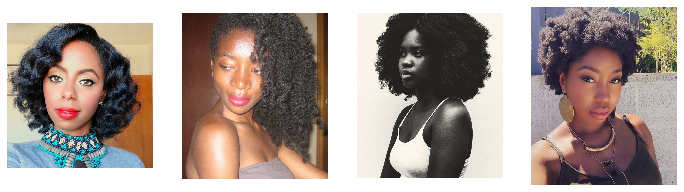

In [ ]:
print('sample 4c images:')
vis.show_random_images(DATADIR+'/train/4c_hair_images/') 

sample 4a images:


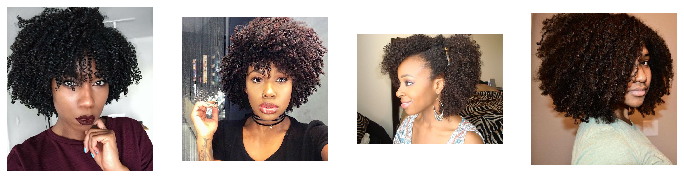

In [ ]:
print('sample 4a images:')
vis.show_random_images(DATADIR+'/train/4a_hair_images/') 

In [ ]:
vis.print_image_classifiers()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [ ]:
model = vis.image_classifier('pretrained_resnet50', train_data, val_data)
learner = ktrain.get_learner(model=model, train_data=train_data, val_data=val_data, 
                             workers=8, use_multiprocessing=False, batch_size=64)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? False
94781440/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


In [ ]:
learner.freeze(freeze_range=15)

In [ ]:
learner.print_layers()

In [ ]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
/usr/local/lib/python3.7/dist-packages/ktrain/core.py:566: UserWarning: max_epochs is being set to 5 since steps per epoch is small. If you wish to estimate LR using more epochs, set max_epochs manually.
  warnings.warn('max_epochs is being set to 5 since steps per epoch is small. ' +\


Epoch 1/5
14/14 [==============================] - 488s 33s/step - loss: 4.9438 - accuracy: 0.1191
Epoch 2/5
14/14 [==============================] - 473s 32s/step - loss: 4.3939 - accuracy: 0.1698
Epoch 3/5
14/14 [==============================] - 475s 35s/step - loss: 4.1403 - accuracy: 0.4517
Epoch 4/5
14/14 [==============================] - 475s 33s/step - loss: 73.1919 - accuracy: 0.1851
Epoch 5/5
14/14 [==============================] - 52s 190us/step - loss: 236.7884 - accuracy: 0.0625


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


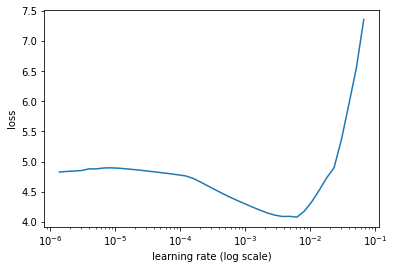

In [ ]:
learner.lr_plot()

In [ ]:
learner.autofit(1e-4)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/1024
15/15 [==============================] - 631s 41s/step - loss: 3.9747 - accuracy: 0.2094 - val_loss: 2.7865 - val_accuracy: 0.3279
Epoch 2/1024
15/15 [==============================] - 608s 40s/step - loss: 2.8572 - accuracy: 0.3520 - val_loss: 1.9910 - val_accuracy: 0.4188
Epoch 3/1024
15/15 [==============================] - 610s 40s/step - loss: 2.1890 - accuracy: 0.4770 - val_loss: 1.8258 - val_accuracy: 0.4935
Epoch 4/1024
15/15 [==============================] - 611s 40s/step - loss: 1.7302 - accuracy: 0.5515 - val_loss: 1.5412 - val_accuracy: 0.5747
Epoch 5/1024
15/15 [==============================] - 576s 37s/step - loss: 1.5465 - accuracy: 0.5998 - val_loss: 1.6253 - val_accuracy: 0.6039
Epoch 6/1024
15/15 [==============================] - 607s 40s/step - loss: 1.4360 - accuracy: 

save the model

In [ ]:

loss, acc = learner.model.evaluate_generator(learner.val_data, 
                                             steps=len(learner.val_data))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print('final loss:%s, final accuracy:%s' % (loss, acc))

final loss:1.2918498516082764, final accuracy:0.7045454382896423


In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('/content')

NameError: ignored

In [ ]:

predictor.predict_filename('/content/these-celebs-were-photoshopped-with-short-natural-2-11404-1501861950-9_dblbig.jpg')

['4a_hair_images']

In [ ]:
predictor.predict_proba_filename('/content/these-celebs-were-photoshopped-with-short-natural-2-11404-1501861950-9_dblbig.jpg')

array([[8.0484989e-07, 8.2203775e-07, 2.0139055e-06, 1.6405885e-04,
        1.2646368e-02, 9.5175698e-02, 8.7420237e-01, 1.7807929e-02]],
      dtype=float32)

In [ ]:
predictor.explain('/content/these-celebs-were-photoshopped-with-short-natural-2-11404-1501861950-9_dblbig.jpg')

NameError: ignored